# Predicting Remaining Useful Life

I tried to predict the RUL(Remaining Useful Life) values for the 100 trajectories in the FD001 dataset from Turbofan Engine Degradation Simulation Data Set from NASA.

## Importing Modules

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1) Loading The Data

In [14]:
train_df = pd.read_csv('CMAPSSData/train_FD001.txt', sep=" ", header=None)

In [15]:
train_df.columns = ["unit", "cycle","os1","os2","os3","sm1","sm2","sm3",
                    "sm4","sm5","sm6","sm7","sm8","sm9","sm10","sm11",
                    "sm12","sm13","sm14","sm15","sm16","sm17","sm18","sm19",
                    "sm20","sm21","sm22","sm23"]

In [16]:
train_df.head()

,unit,cycle,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,sm22,sm23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
unit     20631 non-null int64
cycle    20631 non-null int64
os1      20631 non-null float64
os2      20631 non-null float64
os3      20631 non-null float64
sm1      20631 non-null float64
sm2      20631 non-null float64
sm3      20631 non-null float64
sm4      20631 non-null float64
sm5      20631 non-null float64
sm6      20631 non-null float64
sm7      20631 non-null float64
sm8      20631 non-null float64
sm9      20631 non-null float64
sm10     20631 non-null float64
sm11     20631 non-null float64
sm12     20631 non-null float64
sm13     20631 non-null float64
sm14     20631 non-null float64
sm15     20631 non-null float64
sm16     20631 non-null float64
sm17     20631 non-null int64
sm18     20631 non-null int64
sm19     20631 non-null float64
sm20     20631 non-null float64
sm21     20631 non-null float64
sm22     0 non-null float64
sm23     0 non-null float64
dtypes: flo

I first drop the columns that consisted of missing values

In [18]:
train_df.dropna(axis=1,inplace=True)

In [19]:
train_df.head()

,unit,cycle,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm12,sm13,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [20]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
os1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
os2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
os3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sm1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sm2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sm3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sm4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sm5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [12]:
# train_df.drop(['sm1','sm5','sm10','sm16','sm18','os3'], axis=1, inplace=True)

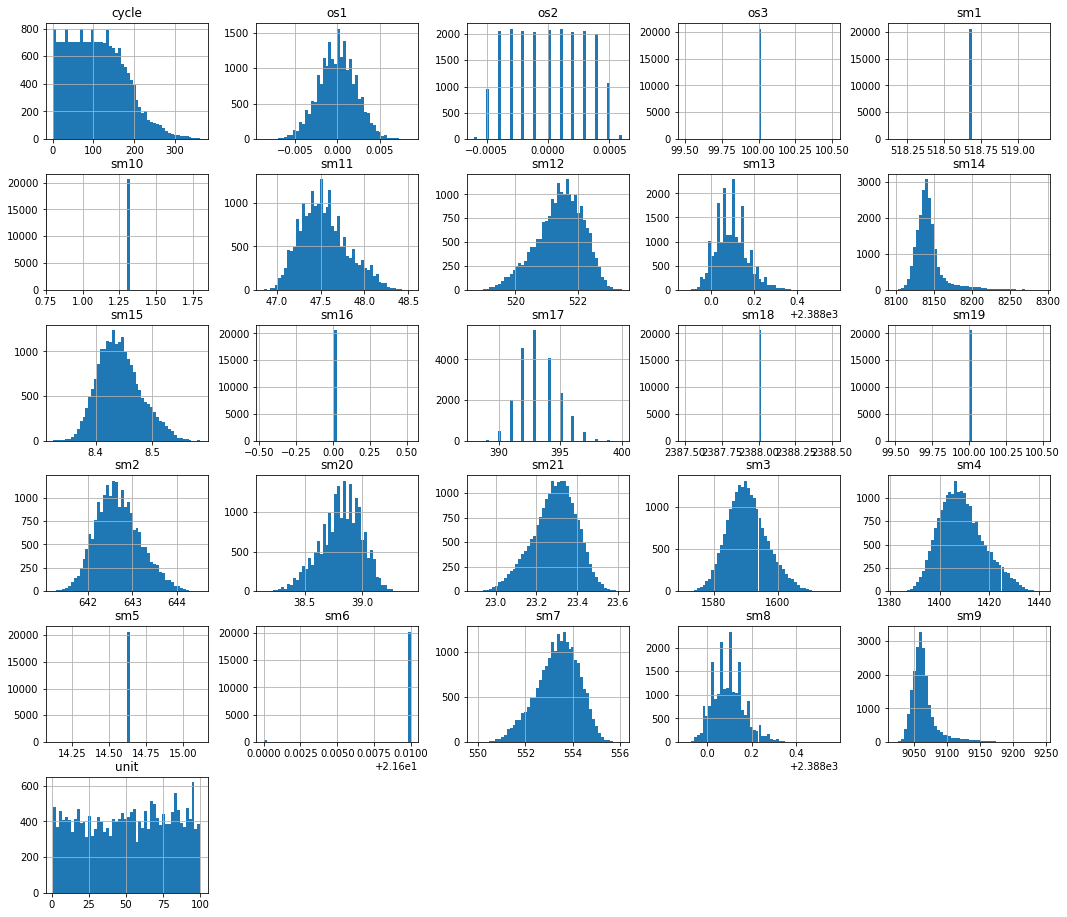

In [22]:
train_df.hist(bins=50, figsize=(18,16))
plt.show()

In [13]:
train_df.groupby('unit').mean()

,cycle,os1,os2,sm2,sm3,sm4,sm6,sm7,sm8,sm9,sm11,sm12,sm13,sm14,sm15,sm17,sm19,sm20,sm21
unit,,,,,,,,,,,,,,,,,,,
1,96.5,-0.000189,4.843750e-05,642.621042,1589.485521,1407.262135,21.610000,553.439427,2388.110260,9048.265833,47.514063,521.459427,2388.110833,8128.913542,8.436555,392.854167,100.0,38.840052,23.306310
2,144.0,0.000051,8.815331e-05,642.435226,1588.181986,1404.265854,21.609338,553.853484,2388.057213,9062.652439,47.389512,521.811603,2388.053554,8143.246167,8.423983,392.386760,100.0,38.901150,23.338997
3,90.0,0.000137,-1.396648e-05,642.543743,1588.715084,1405.628994,21.609777,553.800056,2388.049777,9081.265866,47.427039,521.773966,2388.047430,8159.557654,8.430236,392.754190,100.0,38.882793,23.321931
4,95.0,0.000150,6.719577e-05,642.662381,1590.563280,1408.253915,21.609947,553.443016,2388.079101,9077.366825,47.515132,521.501005,2388.082275,8154.574444,8.439303,393.291005,100.0,38.830265,23.294502
5,135.0,0.000136,-6.059480e-05,642.451970,1588.153271,1404.878439,21.609331,553.882342,2388.034201,9083.948253,47.402268,521.866431,2388.029071,8161.807844,8.425968,392.646840,100.0,38.891078,23.336284
6,94.5,0.000006,-8.650549e-22,642.942340,1592.706277,1413.876117,21.610000,552.790532,2388.175585,9039.279415,47.710372,520.925798,2388.179468,8119.317128,8.458306,393.792553,100.0,38.727447,23.235116
7,130.0,0.000102,-4.980695e-05,642.563320,1589.327838,1406.577336,21.609730,553.650309,2388.060772,9071.470463,47.466564,521.653475,2388.061737,8149.527413,8.433265,392.992278,100.0,38.862124,23.310668
8,75.5,0.000008,2.600000e-05,642.934200,1593.001400,1413.969933,21.610000,552.742600,2388.172733,9044.636133,47.712600,520.898867,2388.170667,8123.167533,8.463234,393.786667,100.0,38.725733,23.228078
9,101.0,-0.000323,4.975124e-06,642.396716,1588.308060,1403.030647,21.609204,554.074030,2388.022786,9093.465174,47.343284,522.031592,2388.014826,8170.726517,8.419438,392.512438,100.0,38.908756,23.353426


In [39]:
grp = train_df.groupby(['unit']).agg({'cycle' : 'max'}).reset_index()

grp.rename(columns = {'cycle' : 'total_cycles'}, inplace = True)

data = train_df.merge(grp, how = 'left', left_on = 'unit', right_on = 'unit')
data['RUL'] = data.apply(lambda r: int(r['total_cycles'] - r['cycle']), axis = 1)
    

In [40]:
data.head()

,unit,cycle,os1,os2,os3,sm1,sm2,sm3,sm4,sm5,...,sm14,sm15,sm16,sm17,sm18,sm19,sm20,sm21,total_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
